# Ranking canciones Rock

El punto de partida es una tabla que contiene las canciones más populares del género Rock, dando los datos del artista, el año de lanzamiento, la popularidad, bailabilidad, energía, la presencia de público en la grabación, el tempo y el compás.
Comenzaremos importando una serie de módulos:

In [1]:
import csv
import math
from matplotlib import pyplot as plt
from collections import namedtuple

### FUNCIÓN DE LECTURA DEL ARCHIVO CSV

In [2]:
Registro = namedtuple('Registro','name artist release_date popularity danceability energy liveness tempo time_signature')
def lee_rock(fichero):
    '''
    Lee el archivo csv y devuelve una lista de tuplas.
    Todos los datos de entrada son de tipo str.
    Convierte los datos relativos a la población en enteros (int).
    
    '''
    with open ("HR21.csv", encoding= 'utf-8') as f:
        lector = csv.reader(f, delimiter=';')
        for linea in f: 
            rock = [Registro(name, artist, int(release_date), float(popularity), float(danceability), float(energy), float(liveness), float(tempo), str(time_signature)) for name, artist, release_date, popularity, danceability, energy, liveness, tempo, time_signature in lector]
        return rock

In [3]:
#prueba de la función de lectura
ranking_canciones_rock = lee_rock("HR21.csv")
print(ranking_canciones_rock [:5])

[Registro(name='Stairway to Heaven', artist='Led Zeppelin', release_date=1971, popularity=78.0, danceability=0.338, energy=0.34, liveness=0.116, tempo=82.433, time_signature='4'), Registro(name='Bohemian Rhapsody', artist='Queen', release_date=1975, popularity=74.0, danceability=0.392, energy=0.402, liveness=0.243, tempo=143.883, time_signature='4'), Registro(name='Imagine', artist='John Lennon', release_date=1971, popularity=77.0, danceability=0.547, energy=0.257, liveness=0.0935, tempo=75.752, time_signature='4'), Registro(name="(I Can't Get No) Satisfaction - Mono Version", artist='The Rolling Stones', release_date=1965, popularity=77.0, danceability=0.723, energy=0.863, liveness=0.128, tempo=136.302, time_signature='4'), Registro(name='Hotel California', artist='Eagles', release_date=1976, popularity=83.0, danceability=0.579, energy=0.508, liveness=0.0575, tempo=147.125, time_signature='4')]


Nos devuelve una lista de tuplas con el ranking de canciones de rock que queríamos.

### FUNCIÓN DE TRANSFORMACIÓN

Para saber cuántos cantantes hay y quiénes son aplicaremos una función de transformación.

La idea es tomar los elementos en la columna "Artist" en una lista y transformar esta a un conjunto, de forma que no se repitan los valores.

In [4]:
def calcula_artistas(canciones):
    '''
    Toma la lista de tuplas poblacion_mundial y extrae el elemento que corresponda al continente.
    '''
    lista_artistas = []
    for tupla in ranking_canciones_rock:
        artistas = tupla[1] #el nombre de cada artista ocupa el segundo lugar.
        lista_artistas.append(artistas)
    lista_artistas = set(lista_artistas)
    return lista_artistas

In [5]:
#prueba de la función
artistas = calcula_artistas(ranking_canciones_rock)
print("El número de artistas en el ranking es", len(artistas), '.')

El número de artistas en el ranking es 1361 .


In [6]:
def calcula_compas(compas):
    '''
    Toma la lista de tuplas Ranking_canciones_rock y extrae el elemento que corresponda al compás.
    '''
    lista_compas = []
    for tupla in ranking_canciones_rock:
        compas = tupla[8] 
        lista_compas.append(compas)
    lista_compas = set(lista_compas)
    return lista_compas

In [7]:
#prueba de la función
compas  = calcula_compas(ranking_canciones_rock)
print(compas)
print("El número de tipos de compases en el ranking es", len(compas))

{'4', '5', '3', '1'}
El número de tipos de compases en el ranking es 4


### FUNCIÓN DE FILTRADO

Gracias a la función de filtrado podemos ver las canciones que cumplen algún requisito, como tener un compás determinado o ser de algún grupo en concreto. 

Primero creamos una función mostrar numerado que nos permitirá crear una colección con el filtrado que hagamos.

In [8]:
def mostrar_numerado(coleccion):
    i=0
    for p in coleccion:
        i=i+1
        print (i, p) 

In [9]:
def filtra_por_artistas(rock, artist):
    
    filtradas = [(n,a,r,p,d,e,l,t,t) for n,a,r,p,d,e,l,t,t in rock if a=="Led Zeppelin"]
    return filtradas

In [10]:
canciones_artista = filtra_por_artistas(ranking_canciones_rock, 'a')
print("Canciones del artista")
print("Encontradas " , len(canciones_artista), "canciones de Led Zeppelin")
mostrar_numerado(canciones_artista[:5])

Canciones del artista
Encontradas  43 canciones de Led Zeppelin
1 ('Stairway to Heaven', 'Led Zeppelin', 1971, 78.0, 0.338, 0.34, 0.116, '4', '4')
2 ('Whole Lotta Love', 'Led Zeppelin', 1969, 77.0, 0.412, 0.902, 0.405, '4', '4')
3 ('Kashmir', 'Led Zeppelin', 1975, 69.0, 0.48, 0.536, 0.155, '3', '3')
4 ('Rock and Roll', 'Led Zeppelin', 1971, 67.0, 0.317, 0.887, 0.0891, '4', '4')
5 ('Black Dog', 'Led Zeppelin', 1971, 72.0, 0.437, 0.864, 0.242, '4', '4')


In [11]:
def filtra_por_compas(rock, time_signature):
    filtrados = [(n,a,r,p,d,e,l,t,t) for n,a,r,p,d,e,l,t,s in rock if s in time_signature]
    return filtrados

In [12]:
#prueba de la función
filtrado_por_compas = filtra_por_compas(ranking_canciones_rock, "5")
print("Las canciones cuyo compas es 5 son:")
mostrar_numerado(filtrado_por_compas)


Las canciones cuyo compas es 5 son:
1 ('Fight For Your Right', 'Beastie Boys', 1986, 69.0, 0.503, 0.858, 0.0803, 133.615, 133.615)
2 ('Drive', 'The Cars', 1984, 69.0, 0.582, 0.606, 0.151, 111.441, 111.441)
3 ('Downfall', 'TRUSTcompany', 2002, 59.0, 0.31, 0.94, 0.205, 128.682, 128.682)
4 ('The Good Left Undone', 'Rise Against', 2006, 49.0, 0.179, 0.98, 0.121, 196.983, 196.983)
5 ('The Trees', 'Rush', 1978, 48.0, 0.445, 0.721, 0.186, 135.742, 135.742)
6 ('All Good Naysayers, Speak Up! Or Forever Hold Your Peace!', 'Sufjan Stevens', 2003, 35.0, 0.545, 0.7, 0.112, 90.472, 90.472)
7 ("That Don't Impress Me Much", 'Shania Twain', 1997, 0.0, 0.745, 0.869, 0.139, 125.005, 125.005)
8 ('This Could Be Anywhere In The World', 'Alexisonfire', 2006, 54.0, 0.192, 0.757, 0.123, 83.105, 83.105)
9 ('Morning Bell', 'Radiohead', 2000, 51.0, 0.645, 0.462, 0.34, 142.137, 142.137)
10 ('Faithfully', 'Journey', 1983, 68.0, 0.202, 0.644, 0.109, 85.04, 85.04)
11 ('Cattle and Cane - Live', 'The Go-Betweens', 1999

Ahora probamos a ordenar estas canciones por el año de publicación. 

In [13]:
sorted(filtrado_por_compas [:5], reverse=False, key=lambda x:x[2])


[('The Trees', 'Rush', 1978, 48.0, 0.445, 0.721, 0.186, 135.742, 135.742),
 ('Drive', 'The Cars', 1984, 69.0, 0.582, 0.606, 0.151, 111.441, 111.441),
 ('Fight For Your Right',
  'Beastie Boys',
  1986,
  69.0,
  0.503,
  0.858,
  0.0803,
  133.615,
  133.615),
 ('Downfall', 'TRUSTcompany', 2002, 59.0, 0.31, 0.94, 0.205, 128.682, 128.682),
 ('The Good Left Undone',
  'Rise Against',
  2006,
  49.0,
  0.179,
  0.98,
  0.121,
  196.983,
  196.983)]

In [14]:
def filtra_por_artista(rock, artist):
    
    filtradas = [(r.name, r.artist, r.release_date, r.popularity, r.danceability, r.energy, r.liveness, r.tempo, r.time_signature) for r in rock if r.artist=="KISS"]
    return filtradas

In [15]:
canciones_artistas = filtra_por_artista(ranking_canciones_rock, 'a')
print("Canciones del artista")
print("Encontradas " , len(canciones_artistas), "canciones de KISS")
mostrar_numerado(canciones_artistas)

Canciones del artista
Encontradas  20 canciones de KISS
1 ('Rock And Roll All Nite', 'KISS', 1975, 75.0, 0.654, 0.929, 0.0539, 144.774, '4')
2 ("I Was Made For Lovin' You", 'KISS', 1979, 79.0, 0.768, 0.852, 0.0723, 128.373, '4')
3 ('Detroit Rock City', 'KISS', 1978, 69.0, 0.546, 0.9, 0.292, 90.591, '4')
4 ('Beth', 'KISS', 1976, 61.0, 0.387, 0.238, 0.194, 115.354, '4')
5 ("God Gave Rock 'N' Roll To You II", 'KISS', 1992, 55.0, 0.444, 0.735, 0.637, 145.244, '4')
6 ('I Love It Loud', 'KISS', 1982, 58.0, 0.414, 0.897, 0.0809, 170.916, '4')
7 ('Lick It Up', 'KISS', 1983, 63.0, 0.681, 0.773, 0.311, 120.276, '4')
8 ('Sure Know Something', 'KISS', 1979, 52.0, 0.707, 0.732, 0.13, 115.338, '4')
9 ('Crazy Crazy Nights', 'KISS', 1987, 60.0, 0.591, 0.87, 0.718, 121.682, '4')
10 ('Cold Gin', 'KISS', 1974, 46.0, 0.512, 0.754, 0.0881, 117.588, '4')
11 ('Deuce', 'KISS', 1974, 48.0, 0.44, 0.879, 0.294, 127.686, '4')
12 ('Hotter Than Hell', 'KISS', 1974, 37.0, 0.426, 0.588, 0.0995, 106.026, '4')
13 ('Mr.

In [16]:
lista = (sorted(canciones_artistas [:10], reverse=False, key=lambda x:x[3]))
lista

[('Cold Gin', 'KISS', 1974, 46.0, 0.512, 0.754, 0.0881, 117.588, '4'),
 ('Sure Know Something', 'KISS', 1979, 52.0, 0.707, 0.732, 0.13, 115.338, '4'),
 ("God Gave Rock 'N' Roll To You II",
  'KISS',
  1992,
  55.0,
  0.444,
  0.735,
  0.637,
  145.244,
  '4'),
 ('I Love It Loud', 'KISS', 1982, 58.0, 0.414, 0.897, 0.0809, 170.916, '4'),
 ('Crazy Crazy Nights', 'KISS', 1987, 60.0, 0.591, 0.87, 0.718, 121.682, '4'),
 ('Beth', 'KISS', 1976, 61.0, 0.387, 0.238, 0.194, 115.354, '4'),
 ('Lick It Up', 'KISS', 1983, 63.0, 0.681, 0.773, 0.311, 120.276, '4'),
 ('Detroit Rock City', 'KISS', 1978, 69.0, 0.546, 0.9, 0.292, 90.591, '4'),
 ('Rock And Roll All Nite',
  'KISS',
  1975,
  75.0,
  0.654,
  0.929,
  0.0539,
  144.774,
  '4'),
 ("I Was Made For Lovin' You",
  'KISS',
  1979,
  79.0,
  0.768,
  0.852,
  0.0723,
  128.373,
  '4')]

Vamos a realizar un diagrama de puntos con la relación entre la energía y la bailabilidad de las canciones más populares.

In [17]:
def muestra_relacion_energia_bailabilidad(registros, umbral_popularidad=75):

    populares = [r for r in registros if r.popularity>=umbral_popularidad]
    energias = [r.energy for r in populares]
    bailabilidad = [r.danceability for r in populares]
    tempo = [r.time_signature for r in populares]
    publico = [r.liveness for r in populares]
    plt.scatter(energias, bailabilidad, color='purple')
    plt.scatter(bailabilidad, publico, color='pink')
    plt.show()

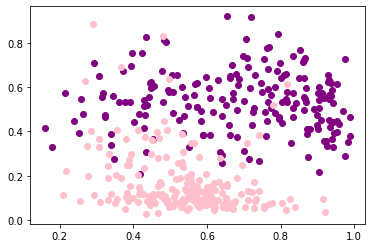

In [18]:
muestra_relacion_energia_bailabilidad(ranking_canciones_rock)

## DIAGRAMA DE TARTAS

Realizamos un diagrama de tartas que nos muestre el número de canciones publicadas por año del grupo KISS.

In [19]:
años = sorted(list({p.release_date for p in ranking_canciones_rock}))
print(años)
print(len(años))

[1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
65


In [29]:
decadas_50 = list(p for p in ranking_canciones_rock if p.release_date < 1960)
decadas_60 = list(p for p in años if 1960<= p < 1970)
decadas_70 = list(p for p in años if 1970<= p < 1980)
decadas_80 = list(p for p in años if 1980<= p < 1990)
decadas_90 = list(p for p in años if 1990<= p < 2000)
decadas_00 = list(p for p in años if 2000<= p < 2010)
decadas_10 = list(p for p in años if 2010<= p <= 2020)


In [30]:
def contar_canciones(años):
    canciones = dict()
    for p in decadas_50:
        clave=p.release_date
        if clave in canciones:
            canciones[clave] +=1
        else:
            canciones[clave] = 1
    return canciones

Agrupamos las canciones por años

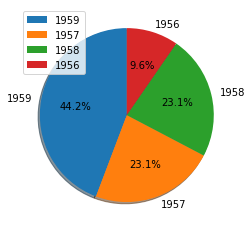

In [31]:
def mostrar_distribucion_canciones(canciones):
    ''' Muestra un diagrama de tarta con la distribución de uso de varias etiquetas
    
    ENTRADA: 
       - preguntas: lista de preguntas (puntuacion, titulo, año, etiqueta) -> [Pregunta(int, str, int, str)]
       - etiquetas: lista de etiquetas que se inlcuirán en la gráfica
    SALIDA EN PANTALLA: 
       - gráfica con un diagrama de tarta con un sector por cada año
    
    Se usarán las siguientes instrucciones para generar la gráfica:
        plt.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90)
        plt.legend()
        plt.show()

    Donde 'tamaños' es una lista, alineada con la lista de etiquetas, con el número de preguntas para
    cada etiqueta.  
    '''
    años,frecuencias= tuple(zip(*contar_canciones(canciones).items()))
    plt.pie(frecuencias, labels=años, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.legend()
    plt.show()
mostrar_distribucion_canciones(ranking_canciones_rock)


In [23]:
def test_mostrar_distribucion_canciones(canciones):
    print("TEST de 'mostrar_distribucion_etiquetas'\n")
